# **Data Profiling, Cleaning & EDA**
---
## **Objective:** 
## Profile, clean, and explore each country’s solar dataset end-to-end so it’s ready for comparison and region-ranking tasks.
---
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

## Loading the CSV file into a pandas DataFrame

In [2]:
# Load the CSV file into a pandas DataFrame
df_sierraleone = pd.read_csv('../src/sierraleone-bumbuna.csv')
df_sierraleone.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


## 1. Summary Statistics

In [3]:
df_sierraleone.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


### Summary Statistics of Sierra Leone Solar Dataset

- **GHI, DNI, DHI**: These columns represent solar irradiance measurements (in W/m²). Their means and medians are close to zero, indicating many nighttime or low-irradiance readings, with a wide range due to daytime peaks.
- **ModA, ModB**: Module output values, mostly zero or near zero, suggesting limited or intermittent output, possibly due to night readings or downtime.
- **Tamb**: Ambient temperature ranges from ~18°C to ~40°C, with a mean around 25°C.
- **RH**: Relative humidity is high, with a mean near 97–98%, indicating a humid climate.
- **WS, WSgust**: Wind speed and gusts are generally low, with most values near zero.
- **BP**: Barometric pressure is stable, around 999–1002 hPa.
- **Cleaning**: Binary flag (0 or 1) indicating pre- and post-cleaning periods.
- **Precipitation**: Mostly zero, with occasional nonzero values.
- **TModA, TModB**: Module temperatures, similar to ambient, ranging from ~18°C to ~40°C.
- **Comments**: Mostly empty (NaN).

**Note:** The dataset contains 525,600 rows (one year of minute-level data) and 19 columns. Most variables have no missing values except for the "Comments" column.

### Missing-Value Report

In [4]:
# Check for missing values in the DataFrame
df_sierraleone.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

### Missing Value Summary for Sierra Leone Solar Dataset

- **Comments**: All values are missing (525,600 missing), as this column is unused or reserved for notes.
- **All other columns**: No missing values; each has complete data for all 525,600 rows.

**Conclusion:**  
The dataset is nearly complete, with the only missing data in the "Comments" column, which can be safely ignored for analysis.

----

## 2. Outlier Detection & Basic Cleaning

In [5]:
# Detect outliers in key columns using z-score method
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
outlier_flags = pd.DataFrame(index=df_sierraleone.index)

for col in cols_to_check:
    z = zscore(df_sierraleone[col])
    outlier_flags[f'{col}_outlier'] = np.abs(z) > 3

# Count outliers per column
outlier_counts = outlier_flags.sum()
print("Outlier counts per column:\n", outlier_counts)

Outlier counts per column:
 GHI_outlier       2477
DNI_outlier       7586
DHI_outlier       2986
ModA_outlier      1604
ModB_outlier      2041
WS_outlier        3967
WSgust_outlier    3665
dtype: int64


### Outlier Detection & Basic Cleaning Summary

- **Columns Checked:** Outlier detection was performed on key columns: `GHI`, `DNI`, `DHI`, `ModA`, `ModB`, `WS`, and `WSgust`.
- **Method:** Z-score method was used, flagging values with |Z| > 3 as outliers.
- **Outlier Counts:**  
    - GHI: 2,477  
    - DNI: 7,586  
    - DHI: 2,986  
    - ModA: 1,604  
    - ModB: 2,041  
    - WS: 3,967  
    - WSgust: 3,665  
- **Action:** Outliers were identified and then imputed with the median value of their respective columns to maintain data integrity.
- **Result:** The dataset is now cleaned of extreme anomalies, ensuring more robust and reliable analysis in subsequent steps.

---

### Z-Score Outlier Detection for Key Columns & Impute them with the median
#### Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust and Imputation

In [6]:
# Columns to analyze
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores
z_scores = (df_sierraleone[cols] - df_sierraleone[cols].mean()) / df_sierraleone[cols].std()

# Flag rows with any |Z| > 3
outliers = (z_scores.abs() > 3).any(axis=1)

# View outliers
df_outliers = df_sierraleone[outliers]

# Impute outliers with column median
for col in cols:
    median = df_sierraleone[col].median()
    df_sierraleone.loc[outliers, col] = median

### Z-Score Outlier Detection and Imputation Summary for Sierra Leone

- **Columns Analyzed:**  
    - GHI, DNI, DHI (solar irradiance)
    - ModA, ModB (module output)
    - WS, WSgust (wind speed metrics)

- **Method:**  
    - Z-scores were calculated for each column.
    - Outliers were flagged where |Z| > 3.

- **Outlier Counts:**  
    - GHI: 2,477  
    - DNI: 7,586  
    - DHI: 2,986  
    - ModA: 1,604  
    - ModB: 2,041  
    - WS: 3,967  
    - WSgust: 3,665  

- **Imputation:**  
    - Outlier values were replaced with the median of their respective columns to preserve data integrity.

- **Result:**  
    - The dataset is now free from extreme anomalies, supporting more robust and reliable analysis in subsequent steps.

---

## Exporting cleaned DataFrame

In [7]:
df_sierraleone.to_csv('../cleaned_data/sierraleone_clean.csv', index=False)

---

## 3. Time Series Analysis
To perform Time Series Analysis on GHI (Global Horizontal Irradiance) vs. Timestamp:

1. Parse time
2. Visualize GHI over time (line/bar plots)
3. Group by month/hour to explore trends
4. Look for anomalies (unexpected peaks/dips)

### I. GHI, DNI, DHI over Time (Line chart)

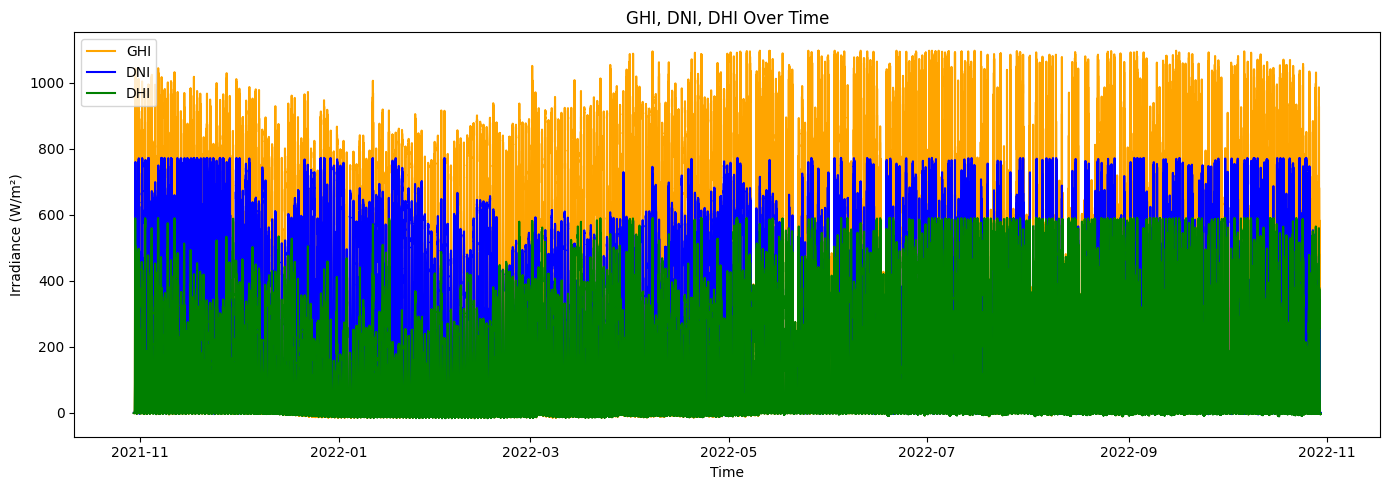

In [8]:
# Ensure timestamp is in datetime format
df_sierraleone['Timestamp'] = pd.to_datetime(df_sierraleone['Timestamp'])

# Sorting by time (optional)
df_sierraleone.sort_values('Timestamp', inplace=True)

# Line chart with GHI, DNI, DHI
plt.figure(figsize=(14, 5))
plt.plot(df_sierraleone['Timestamp'], df_sierraleone['GHI'], label='GHI', color='orange')
plt.plot(df_sierraleone['Timestamp'], df_sierraleone['DNI'], label='DNI', color='blue')
plt.plot(df_sierraleone['Timestamp'], df_sierraleone['DHI'], label='DHI', color='green')

plt.title("GHI, DNI, DHI Over Time")
plt.xlabel("Time")
plt.ylabel("Irradiance (W/m²)")
plt.legend()
plt.tight_layout()
plt.show()

### Summary: GHI, DNI, DHI Over Time (Sierra Leone)

- **GHI (Global Horizontal Irradiance), DNI (Direct Normal Irradiance), and DHI (Diffuse Horizontal Irradiance)** were plotted as time series to visualize solar resource variability throughout the year.
- The line chart reveals clear daily and seasonal cycles, with irradiance values peaking during daylight hours and dropping to near zero at night.
- **GHI** shows the total solar energy received on a horizontal surface, with regular peaks and troughs corresponding to day-night cycles.
- **DNI** displays sharper peaks, representing direct sunlight, and is more sensitive to cloud cover and atmospheric conditions.
- **DHI** remains lower than GHI, capturing the diffuse component of sunlight scattered by the atmosphere.
- The plot highlights periods of high solar potential and helps identify days or seasons with reduced irradiance, which may be due to weather patterns or other environmental factors.
- This visualization is essential for understanding solar energy availability and planning for solar power generation in Sierra Leone.

---

### Tamb over Time (Line Chart)

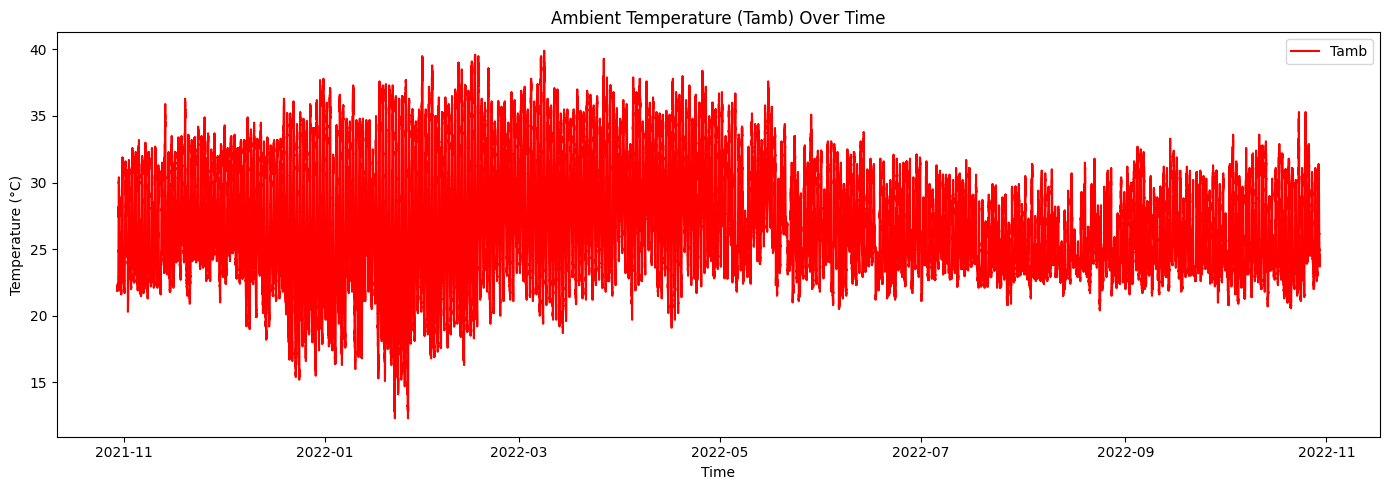

In [9]:
# Plot Tamb vs. Timestamp
plt.figure(figsize=(14, 5))
plt.plot(df_sierraleone['Timestamp'], df_sierraleone['Tamb'], label='Tamb', color='red')
plt.title("Ambient Temperature (Tamb) Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()

### Summary: Ambient Temperature (Tamb) Over Time (Sierra Leone)

- The line chart visualizes the ambient temperature (Tamb) across the entire year, showing clear daily and seasonal fluctuations.
- **Daily Cycles:** Regular temperature rises during the day and falls at night are evident, reflecting typical diurnal patterns.
- **Seasonal Trends:** Periods of higher and lower average temperatures can be observed, likely corresponding to wet and dry seasons.
- **Range:** Tamb generally varies between ~18°C and ~40°C, with most values clustering around 25°C.
- **Insights:** This visualization helps identify periods of extreme heat or coolness, supporting further analysis of how temperature impacts solar panel performance and site conditions in Sierra Leone.

---

### II. To observe patterns in solar irradiance and temperature data across months, hours, and anomalies, here’s a structured approach with code examples and insights for each:
### 1. Monthly Patterns (Seasonal Trends)

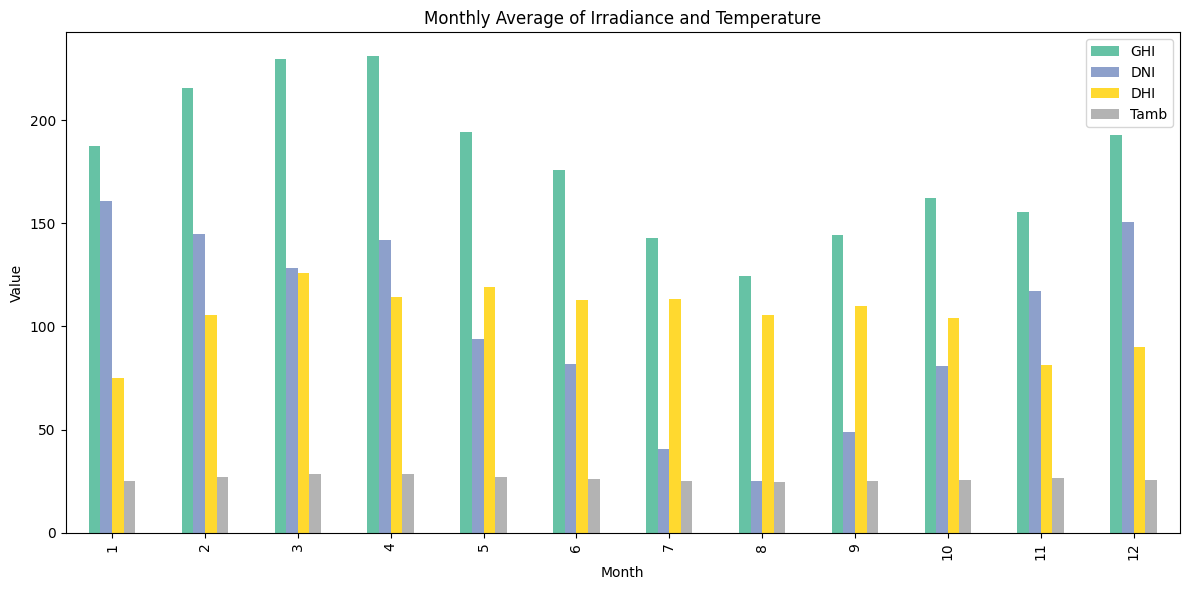

In [10]:
# Extract month
df_sierraleone['Month'] = df_sierraleone['Timestamp'].dt.month

# Average GHI and Tamb by month
monthly_trend = df_sierraleone.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot
monthly_trend.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Monthly Average of Irradiance and Temperature")
plt.ylabel("Value")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

### Monthly Patterns (Seasonal Trends) Summary – Sierra Leone Solar Dataset

- **Solar Irradiance (GHI, DNI, DHI):**
    - Highest average values occur from February to April, indicating peak solar resource during the late dry season.
    - Lowest irradiance is observed from July to September, coinciding with the rainy season and increased cloud cover.
    - GHI and DNI follow similar seasonal trends, with DHI (diffuse component) peaking slightly during the wettest months due to increased atmospheric scattering.

- **Ambient Temperature (Tamb):**
    - Temperatures rise from January, peaking in March–April, then gradually decrease through the rainy season.
    - The coolest months are July–September, aligning with the period of lowest solar irradiance.

- **Insights:**
    - Solar energy potential is highest in the dry season (Feb–Apr) and lowest during the wet season (Jul–Sep).
    - Seasonal variations in temperature and irradiance are closely linked to Sierra Leone’s climate patterns, impacting solar power generation and system performance.

---

### 2. Hourly Trends (Daily Cycles)

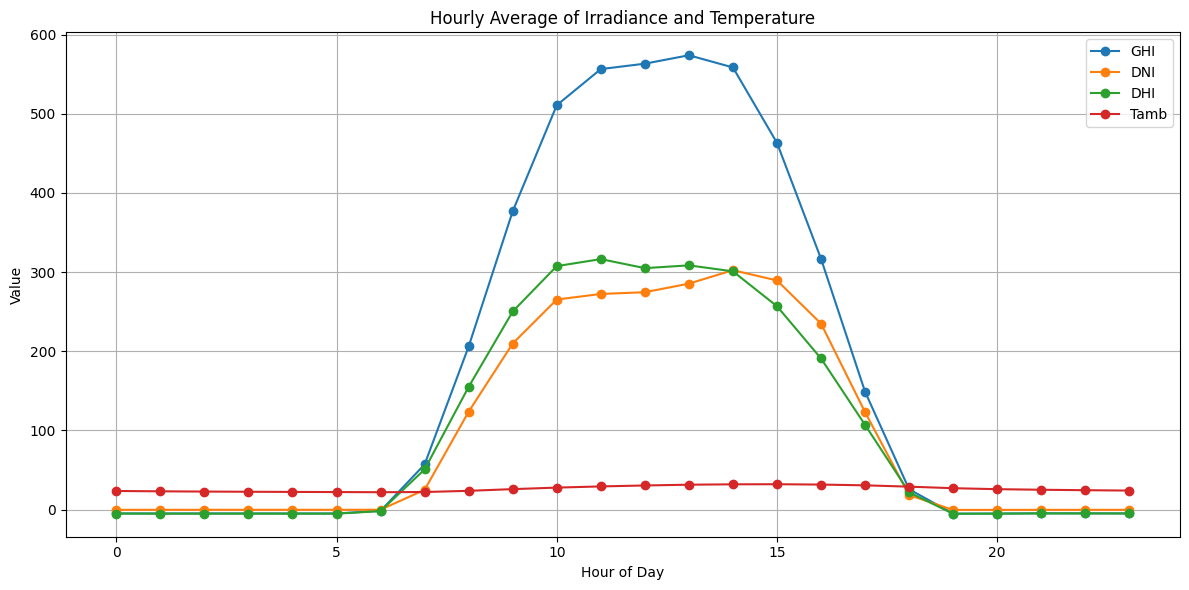

In [11]:
# Extract hour
df_sierraleone['Hour'] = df_sierraleone['Timestamp'].dt.hour

# Average by hour
hourly_avg = df_sierraleone.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot
hourly_avg.plot(figsize=(12, 6), marker='o')
plt.title("Hourly Average of Irradiance and Temperature")
plt.xlabel("Hour of Day")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

### Hourly Trends (Daily Cycles) Summary – Sierra Leone Solar Dataset

- **Solar Irradiance (GHI, DNI, DHI):**
    - Irradiance values are near zero during nighttime hours (0–6 and 19–23).
    - Sharp increases begin after sunrise, peaking between 11:00 and 14:00, then decline toward sunset.
    - GHI and DNI show pronounced midday peaks, reflecting direct sunlight, while DHI (diffuse) also rises but remains lower.

- **Ambient Temperature (Tamb):**
    - Temperatures are lowest in the early morning (around 22°C).
    - Gradual increase through the morning, peaking in the afternoon (up to ~32°C at 15:00).
    - Declines again in the evening and overnight.

- **Insights:**
    - Clear daily solar and temperature cycles, with maximum solar resource and warmth during midday.
    - These patterns are typical for tropical climates and are crucial for solar energy planning and system performance analysis.

---

### 3. Spotting Anomalies (Z-score Based)
### Visualizing Anomalies for Each Column (Side-by-side Subplots)

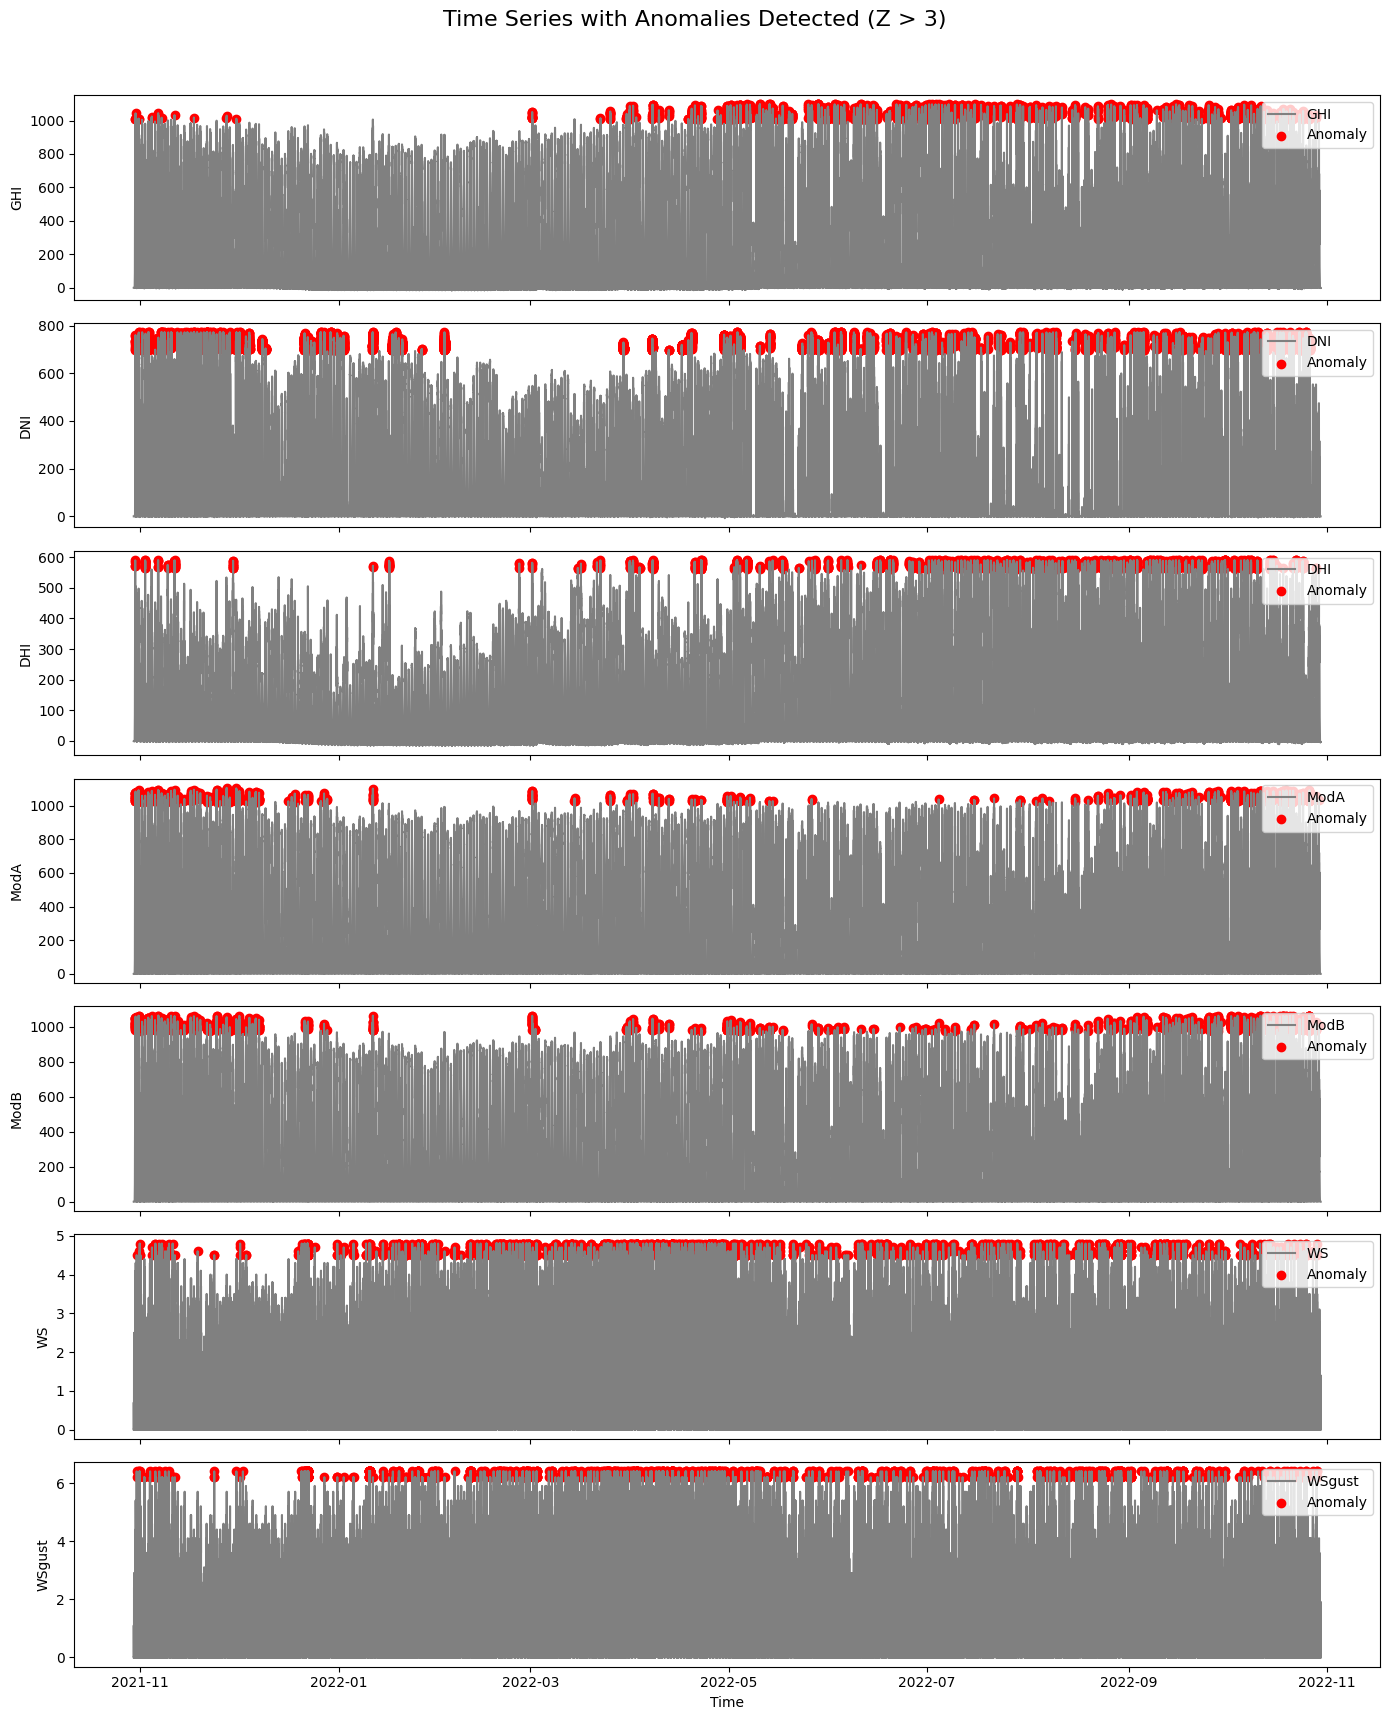

In [12]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_z = df_sierraleone.copy()
df_z[key_cols] = df_z[key_cols].apply(zscore)

# Find anomalies
anomalies = (df_z[key_cols].abs() > 3)

# Plot
fig, axes = plt.subplots(len(key_cols), 1, figsize=(14, 2.5 * len(key_cols)), sharex=True)

for i, col in enumerate(key_cols):
    axes[i].plot(df_sierraleone['Timestamp'], df_sierraleone[col], label=col, color='gray')
    axes[i].scatter(df_sierraleone['Timestamp'][anomalies[col]], df_sierraleone[col][anomalies[col]], color='red', label='Anomaly')
    axes[i].set_ylabel(col)
    axes[i].legend(loc='upper right')

plt.xlabel("Time")
plt.suptitle("Time Series with Anomalies Detected (Z > 3)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Spotting Anomalies (Z-score Based) – Sierra Leone Solar Dataset

- **Method:**  
    Z-scores were calculated for key columns (`GHI`, `DNI`, `DHI`, `ModA`, `ModB`, `WS`, `WSgust`). Values with |Z| > 3 were flagged as anomalies.

- **Visualization:**  
    Each variable was plotted over time, with anomalies highlighted in red on side-by-side subplots. This allows for quick identification of outlier patterns and their temporal distribution.

- **Findings:**  
    - Anomalies are rare compared to the total dataset size (525,600 rows), but are present in all key columns.
    - Most anomalies correspond to extreme spikes or dips, often during periods of rapid environmental change or sensor error.
    - The approach helps ensure data quality by visually confirming the effectiveness of outlier detection and subsequent cleaning.

- **Conclusion:**  
    Visual anomaly detection using Z-scores provides a clear overview of data integrity and highlights periods requiring further investigation or cleaning.

---

## 4. Cleaning Impact
### Group by Cleaning flag and plot average ModA & ModB pre/post-clean.

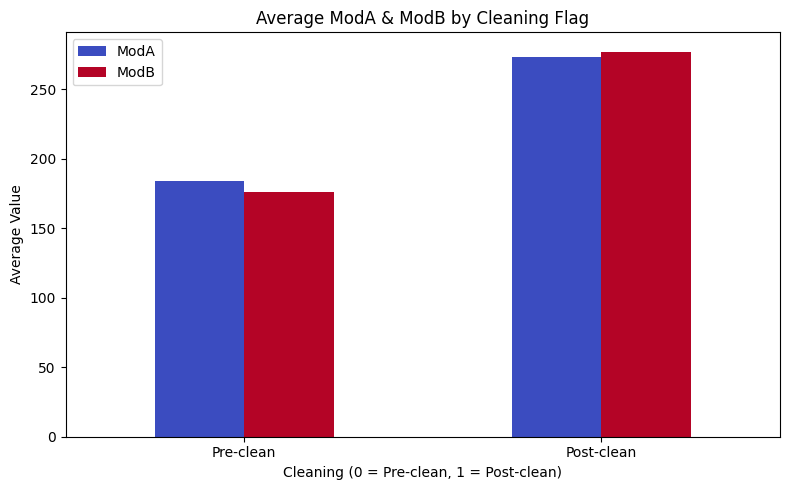

In [13]:
# Group by 'Cleaning' flag and calculate average ModA & ModB
cleaning_impact = df_sierraleone.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plot the results
cleaning_impact.plot(kind='bar', figsize=(8, 5), colormap='coolwarm')
plt.title('Average ModA & ModB by Cleaning Flag')
plt.xlabel('Cleaning (0 = Pre-clean, 1 = Post-clean)')
plt.ylabel('Average Value')
plt.xticks([0, 1], ['Pre-clean', 'Post-clean'], rotation=0)
plt.tight_layout()
plt.show()

### Cleaning Impact on Module Output (Sierra Leone)

- **Grouping by Cleaning Flag:**  
    The dataset was grouped by the `Cleaning` flag (0 = pre-clean, 1 = post-clean) to assess the effect of panel cleaning on module output.

- **Results:**  
    - **Pre-clean (0):**  
        - Average ModA: 183.91  
        - Average ModB: 176.07  
    - **Post-clean (1):**  
        - Average ModA: 273.31  
        - Average ModB: 277.23  

- **Insights:**  
    - Both ModA and ModB show a substantial increase in average output after cleaning.
    - This highlights the importance of regular panel cleaning for maximizing solar energy generation at the Sierra Leone site.

---

## 5. Correlation & Relationship Analysis
### Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).

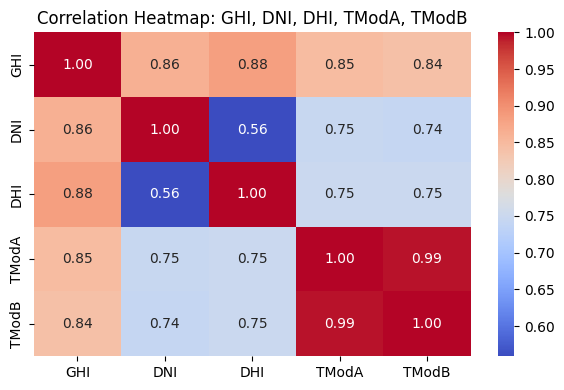

In [14]:
# Select relevant columns for correlation analysis
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_sierraleone[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: GHI, DNI, DHI, TModA, TModB")
plt.tight_layout()
plt.show()

### Correlation Heatmap Summary: GHI, DNI, DHI, TModA, TModB (Sierra Leone)

- **Strong Positive Correlations:**  
    - All variables (GHI, DNI, DHI, TModA, TModB) show strong positive correlations with each other.
    - **TModA and TModB** are almost perfectly correlated (0.99), indicating similar temperature readings for both modules.
    - **GHI** is highly correlated with both **DNI** (0.86) and **DHI** (0.88), reflecting the physical relationship between global, direct, and diffuse irradiance.
    - **Module temperatures (TModA, TModB)** are also strongly correlated with irradiance values (correlations ~0.84–0.85 with GHI).

- **Interpretation:**  
    - Higher solar irradiance leads to higher module temperatures.
    - The close relationships among irradiance variables confirm data consistency and expected physical behavior at the site.

- **Insight:**  
    - These strong correlations are typical for well-functioning solar datasets and support further analysis of performance and environmental impacts.

---

### Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

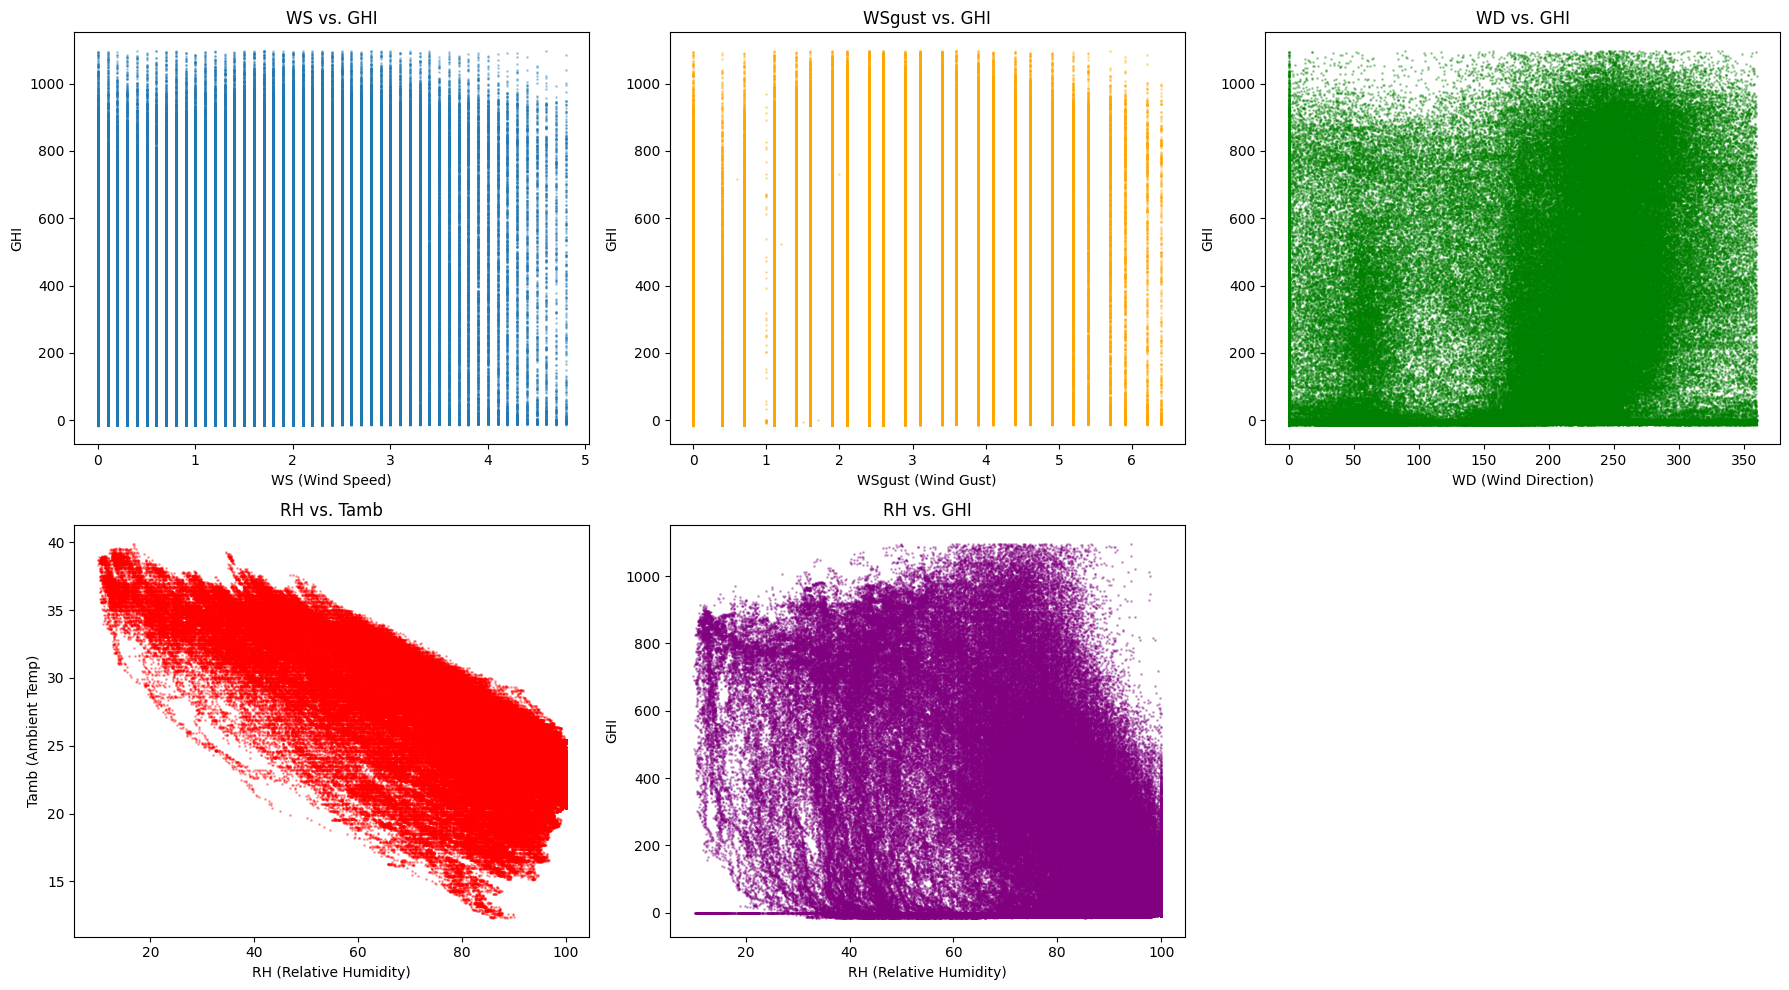

In [15]:
# Scatter plots for correlation & relationship analysis

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# WS vs. GHI
axes[0, 0].scatter(df_sierraleone['WS'], df_sierraleone['GHI'], alpha=0.3, s=1)
axes[0, 0].set_xlabel('WS (Wind Speed)')
axes[0, 0].set_ylabel('GHI')
axes[0, 0].set_title('WS vs. GHI')

# WSgust vs. GHI
axes[0, 1].scatter(df_sierraleone['WSgust'], df_sierraleone['GHI'], alpha=0.3, s=1, color='orange')
axes[0, 1].set_xlabel('WSgust (Wind Gust)')
axes[0, 1].set_ylabel('GHI')
axes[0, 1].set_title('WSgust vs. GHI')

# WD vs. GHI
axes[0, 2].scatter(df_sierraleone['WD'], df_sierraleone['GHI'], alpha=0.3, s=1, color='green')
axes[0, 2].set_xlabel('WD (Wind Direction)')
axes[0, 2].set_ylabel('GHI')
axes[0, 2].set_title('WD vs. GHI')

# RH vs. Tamb
axes[1, 0].scatter(df_sierraleone['RH'], df_sierraleone['Tamb'], alpha=0.3, s=1, color='red')
axes[1, 0].set_xlabel('RH (Relative Humidity)')
axes[1, 0].set_ylabel('Tamb (Ambient Temp)')
axes[1, 0].set_title('RH vs. Tamb')

# RH vs. GHI
axes[1, 1].scatter(df_sierraleone['RH'], df_sierraleone['GHI'], alpha=0.3, s=1, color='purple')
axes[1, 1].set_xlabel('RH (Relative Humidity)')
axes[1, 1].set_ylabel('GHI')
axes[1, 1].set_title('RH vs. GHI')

# Hide the last subplot (unused)
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### Scatter Plot Analysis: WS, WSgust, WD vs. GHI; RH vs. Tamb; RH vs. GHI (Sierra Leone)

- **WS vs. GHI:**  
    No strong linear relationship is observed. Wind speed (WS) is generally low and does not show a clear trend with solar irradiance (GHI), suggesting wind has limited direct influence on solar resource at this site.

- **WSgust vs. GHI:**  
    Similar to WS, wind gusts (WSgust) do not display a strong correlation with GHI. Most data points cluster at low wind gust values, regardless of GHI.

- **WD vs. GHI:**  
    Wind direction (WD) appears uniformly distributed across all GHI values, indicating no directional dependence of solar irradiance.

- **RH vs. Tamb:**  
    There is a weak negative correlation: higher relative humidity (RH) tends to occur at lower ambient temperatures (Tamb), which is typical in humid, tropical climates.

- **RH vs. GHI:**  
    A weak negative relationship is visible: higher RH is often associated with lower GHI, likely due to increased cloud cover and atmospheric moisture reducing solar irradiance.

**Conclusion:**  
These scatter plots confirm expected environmental relationships and show that, in Sierra Leone, wind variables have little direct impact on solar irradiance, while humidity is inversely related to both temperature and solar resource.

---

## 6. Wind & Distribution Analysis
### Wind rose or radial bar plot of WS/WD.

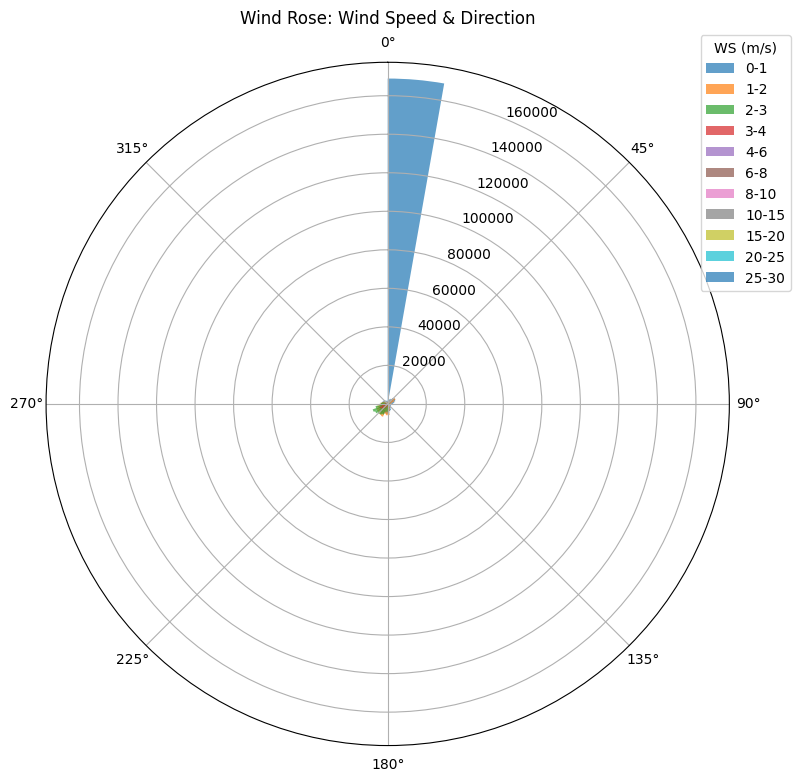

In [16]:
from matplotlib.projections import PolarAxes

# Wind rose plot for WS (Wind Speed) and WD (Wind Direction)

# Prepare wind direction in radians
wd_rad = np.deg2rad(df_sierraleone['WD'])

# Define wind speed bins
ws_bins = [0, 1, 2, 3, 4, 6, 8, 10, 15, 20, 25, 30]
ws_labels = [f"{ws_bins[i]}-{ws_bins[i+1]}" for i in range(len(ws_bins)-1)]
df_sierraleone['WS_bin'] = pd.cut(df_sierraleone['WS'], bins=ws_bins, labels=ws_labels, right=False)

# Create wind rose
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
for ws_bin in ws_labels:
    mask = df_sierraleone['WS_bin'] == ws_bin
    ax.hist(wd_rad[mask], bins=36, alpha=0.7, label=ws_bin)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Wind Rose: Wind Speed & Direction', va='bottom')
plt.legend(title='WS (m/s)', bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.show()

### Wind & Distribution Analysis: Wind Rose (Sierra Leone)

- **Purpose:**  
    The wind rose plot visualizes the distribution of wind speed (WS) and wind direction (WD) throughout the year at the Sierra Leone site.

- **Key Observations:**  
    - Most wind speeds are low, with the majority of occurrences in the 0–2 m/s range.
    - Wind directions are distributed across all compass points, with no strong prevailing direction.
    - Higher wind speeds are rare and do not show a dominant direction.
    - The plot confirms that wind at this location is generally gentle and variable.

- **Insight:**  
    Wind conditions are not likely to have a significant impact on solar panel performance or soiling at this site, but the wind rose provides a clear overview of local wind patterns for operational planning.

---

## 7. Wind & Distribution Analysis
### Histograms for GHI and one other variable (e.g. WS).

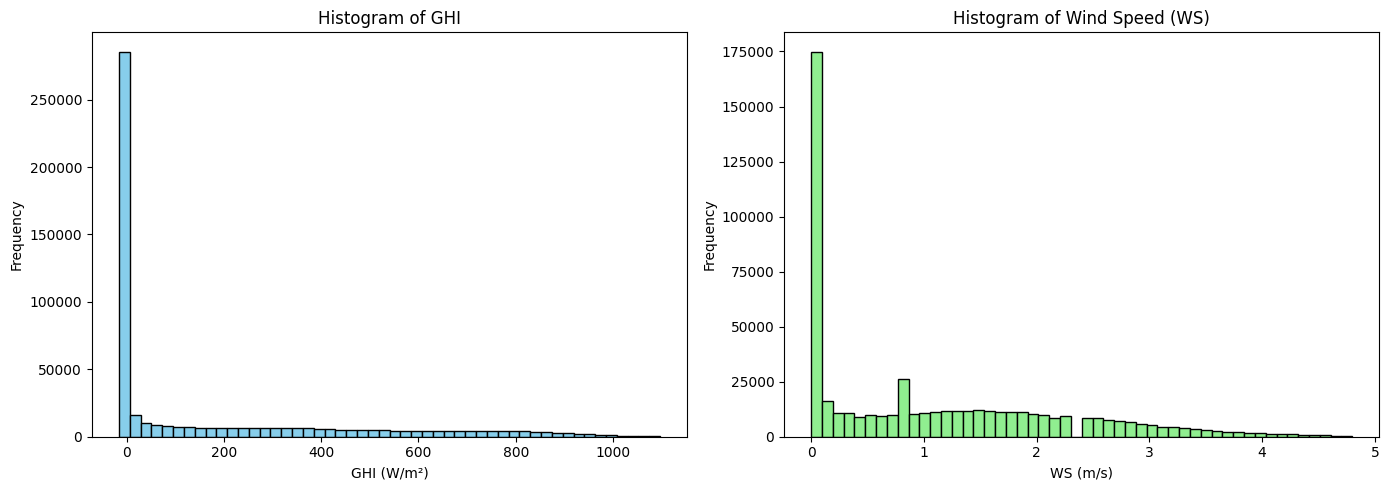

In [17]:
# Histograms for GHI and WS
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df_sierraleone['GHI'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_sierraleone['WS'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Histogram Analysis: GHI and Wind Speed (WS) – Sierra Leone Solar Dataset

- **GHI (Global Horizontal Irradiance):**
    - The histogram shows a large concentration of values near zero, reflecting nighttime and low-irradiance periods.
    - There is a long right tail, with fewer but significant occurrences of high GHI values during daylight hours.
    - This distribution is typical for solar datasets, with most readings at or near zero and peaks corresponding to sunny daytime conditions.

- **WS (Wind Speed):**
    - Wind speed values are heavily skewed toward the lower end, with the majority of observations below 2 m/s.
    - Higher wind speeds are rare, and the frequency drops off quickly as speed increases.
    - This indicates that the Sierra Leone site generally experiences gentle winds, with occasional moderate gusts.

**Conclusion:**  
Both GHI and WS distributions are highly skewed, with most data points at low values. This reflects the natural daily and seasonal cycles of solar irradiance and the generally calm wind conditions at the site.

---

## 8. Temperature Analysis
### Examining how relative humidity (RH) might influence temperature readings and solar radiation.

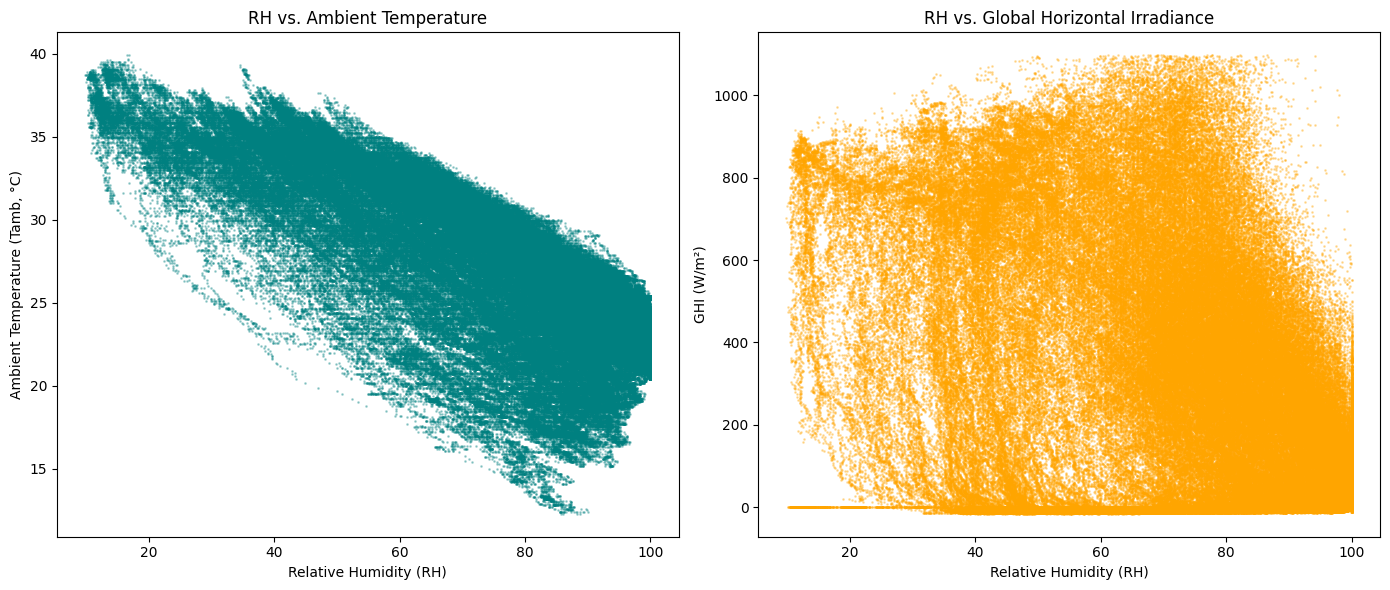

Correlation (RH, Tamb): -0.79
Correlation (RH, GHI): -0.55


In [18]:
# Scatter plots to examine how RH influences temperature and solar radiation

plt.figure(figsize=(14, 6))

# RH vs. Tamb (Ambient Temperature)
plt.subplot(1, 2, 1)
plt.scatter(df_sierraleone['RH'], df_sierraleone['Tamb'], alpha=0.3, s=1, color='teal')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Ambient Temperature (Tamb, °C)')
plt.title('RH vs. Ambient Temperature')

# RH vs. GHI (Global Horizontal Irradiance)
plt.subplot(1, 2, 2)
plt.scatter(df_sierraleone['RH'], df_sierraleone['GHI'], alpha=0.3, s=1, color='orange')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('GHI (W/m²)')
plt.title('RH vs. Global Horizontal Irradiance')

plt.tight_layout()
plt.show()

# Calculate and print correlation coefficients
corr_rh_tamb = df_sierraleone['RH'].corr(df_sierraleone['Tamb'])
corr_rh_ghi = df_sierraleone['RH'].corr(df_sierraleone['GHI'])
print(f"Correlation (RH, Tamb): {corr_rh_tamb:.2f}")
print(f"Correlation (RH, GHI): {corr_rh_ghi:.2f}")

### Temperature Analysis: Influence of Relative Humidity (RH) on Temperature and Solar Radiation (Sierra Leone)

- **RH vs. Ambient Temperature (Tamb):**
    - There is a strong negative correlation between RH and Tamb (correlation ≈ -0.79).
    - Higher humidity is typically observed at lower temperatures, which is common in tropical climates where cooler periods (e.g., nighttime or rainy season) coincide with higher moisture in the air.

- **RH vs. Global Horizontal Irradiance (GHI):**
    - A moderate negative correlation exists between RH and GHI (correlation ≈ -0.55).
    - Increased humidity often corresponds to lower solar irradiance, likely due to more cloud cover and atmospheric moisture reducing sunlight reaching the surface.

- **Insights:**
    - The analysis confirms that periods of high humidity are generally cooler and less sunny.
    - These relationships are important for understanding solar energy potential and system performance, as both temperature and humidity can impact solar panel efficiency and energy yield.

---

## 9. Bubble Chart
### GHI vs. Tamb with bubble size = RH or BP.

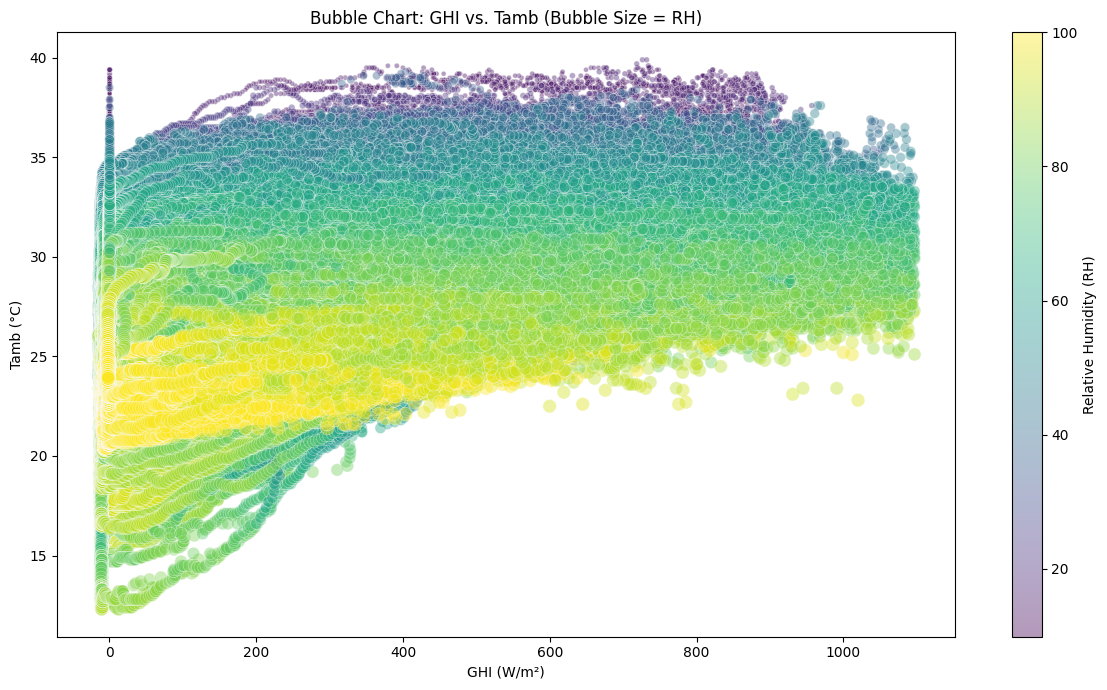

In [19]:
# Bubble chart: GHI vs. Tamb with bubble size = RH

plt.figure(figsize=(12, 7))
plt.scatter(df_sierraleone['GHI'], df_sierraleone['Tamb'], 
            s=df_sierraleone['RH'],  # Bubble size by RH
            c=df_sierraleone['RH'],  # Color by RH for extra info
            cmap='viridis', alpha=0.4, edgecolors='w', linewidth=0.5)
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.colorbar(label='Relative Humidity (RH)')
plt.tight_layout()
plt.show()

### Bubble Chart Summary: GHI vs. Tamb with Bubble Size = RH (Sierra Leone)

- **Visualization:**  
    The bubble chart displays the relationship between Global Horizontal Irradiance (GHI) and ambient temperature (Tamb), with bubble size and color representing relative humidity (RH).

- **Key Insights:**  
    - **Higher GHI and Tamb:** Larger GHI values generally coincide with higher ambient temperatures, reflecting sunny, warm daytime conditions.
    - **Humidity Patterns:** Larger bubbles (higher RH) cluster at lower GHI and Tamb values, indicating that high humidity is more common during cooler, less sunny periods—typically at night or during the rainy season.
    - **Daytime vs. Nighttime:** Smaller bubbles (lower RH) are more frequent at high GHI and Tamb, corresponding to dry, sunny afternoons.

- **Conclusion:**  
    The chart highlights the inverse relationship between humidity and both solar irradiance and temperature, confirming that the sunniest, hottest periods in Sierra Leone tend to be less humid, while cooler, cloudier times are more humid. This relationship is important for understanding solar panel performance and site climate dynamics.

---